# Most Walkable to most pools- CMPINF0010 FINAL PROJECT

![gif](https://media.giphy.com/media/4dL4eV4pNb3MY/giphy.gif)

# Introduction
In this analysis to determine the "best" Pittsburgh neighborhood, we looked amongst multiple datasets regarding parks and recreation facilities in Pittsburgh's multiple communities to determine which neighborhood was the most appealing towards outdoor fun. To achieve this, we decided to look at the pool metrics we thought we would want if we were to decide which neighborhood to live in. A major part of a community is having a place to play outdoors and enjoy the weather which makes a neightborhood more walkable and safe. Without key facilities to keep people entertained, the people would not want to come outside and walk. So the facilities became our evaluation point to determine the "best" Pittsburgh neighborhood. In this research, we focused on the pools in the neighborhoods of Pittsburgh. 

First, we will find the best neighborhood for pools in Pittsburgh.

# Submetric - Pools


Getting wet is one of the most fun things you can do during the summer, especially with how hot it can get in Pittsburgh during the summer. Luckily, Allegheny County is equipped with many community swimming pools and sprayparks. Using a dataset on the locations of these recreational water features, I will develop a metric for determining the best neighborhood in Pittsbugh for pools.



## Metric

There is not much data available to us on pools in Allegheny County other than their locations and whether they are a swimming pool or a spray park. So, our metric will be based on the number of these features in each neighborhood, valuing sprayparks higher as they are rarer.



## Analysis

First we import pandas and import our data.



In [6]:
import pandas as pd 
pools = pd.read_csv("pools.csv")
pools.sample(5)

,_id,id,name,type,retired,water_source,capacity,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
6,7,1569871328,East Hills Spray Park,Spray Park,NaN,Wilkinsburg Penn,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,East Hills,9,13,42003130600,2,13,5,3-19,40.453099,-79.871039
4,5,1287441950,Burgwin Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Hazelwood,5,15,42003562300,3,15,4,2-13,40.405073,-79.936899
15,16,1029407685,Oliver,Pool,NaN,Pennsylvania American Water,107000.0,https://tools.wprdc.org/images/pittsburgh/pool...,South Side Flats,3,17,42003170200,3,17,3,4-2,40.429636,-79.988926
18,19,43656340,Ream,Pool,NaN,Pittsburgh Water and Sewer Authority,356000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Mount Washington,2,19,42003190300,5,19,3,4-27,40.430836,-80.013115
25,26,1702052317,Westwood,Pool,NaN,Pennsylvania American Water,156840.0,https://tools.wprdc.org/images/pittsburgh/pool...,Westwood,2,28,42003563100,5,28,6,1-18,40.430815,-80.049762


Next we strip down our data.



In [7]:
pools = pools[['neighborhood','name','type']]
pools.sample(5)

,neighborhood,name,type
12,Lincoln Place,McBride,Pool
4,Hazelwood,Burgwin Spray Park,Spray Park
23,Beltzhoover,Warrington Spray Park,Spray Park
5,Troy Hill,Cowley Spray Park,Spray Park
16,South Side Flats,Ormsby,Pool


Then we split our data into pools and spray parks.



In [8]:
# split data into pools and sprayparks
sprayparks = pools.loc[pools['type'] == "Spray Park"]
pools = pools.loc[pools['type'] == "Pool"]

In [9]:
pools.head(5)

,neighborhood,name,type
0,Bedford Dwellings,Ammon,Pool
1,Banksville,Banksville,Pool
3,Bloomfield,Bloomfield,Pool
7,Highland Park,Highland - Children,Pool
8,Highland Park,Highland - Main,Pool


In [10]:
sprayparks.head(5)


,neighborhood,name,type
2,Beechview,Beechview Spray Park,Spray Park
4,Hazelwood,Burgwin Spray Park,Spray Park
5,Troy Hill,Cowley Spray Park,Spray Park
6,East Hills,East Hills Spray Park,Spray Park
13,Shadyside,Mellon Spray Park,Spray Park


Now we count the number of pools and spray parks for each neighborhood.



<AxesSubplot:title={'center':'Number of Pools for each Neighborhood'}, xlabel='neighborhood'>

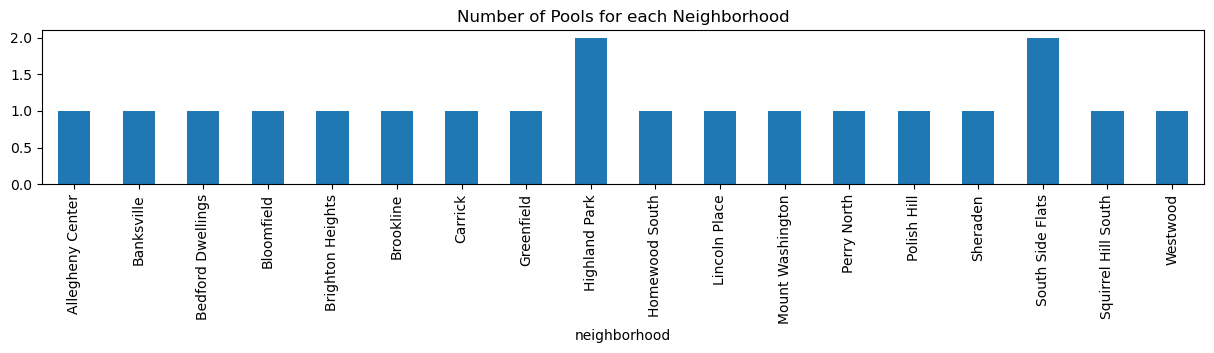

In [11]:
num_pools = pools.groupby('neighborhood')['name'].count()
num_pools.plot.bar(title="Number of Pools for each Neighborhood",  x="neighborhood",figsize=(15,2))

<AxesSubplot:title={'center':'Number of Spray Parks for each Neighborhood'}, xlabel='neighborhood'>

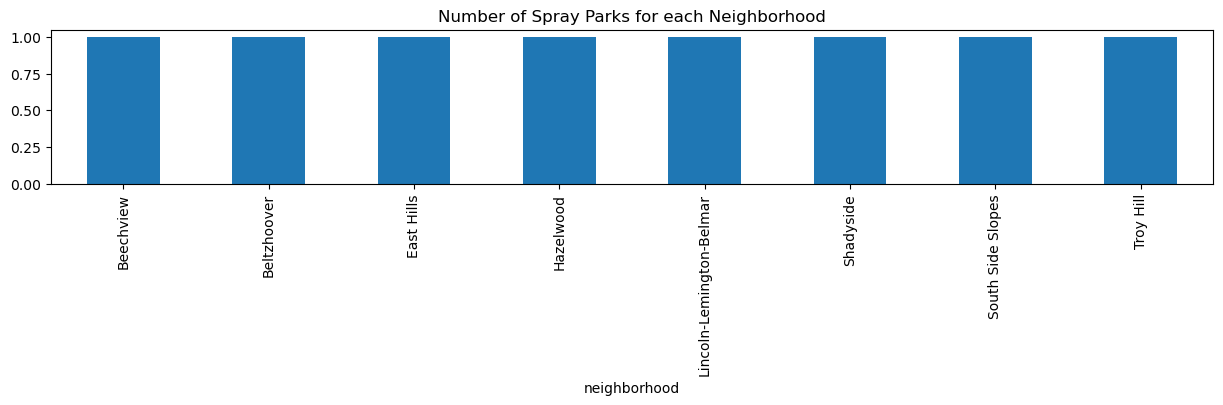

In [12]:
num_sprayparks = sprayparks.groupby('neighborhood')['name'].count()
num_sprayparks.plot.bar(title="Number of Spray Parks for each Neighborhood", x="neighborhood", figsize=(15,2))

Finally, we generate our metric. We multiply the number of spray parks by the ratio of pools to spray parks to account for their rareness.



<AxesSubplot:title={'center':'Best Neighborhood for Pools'}, xlabel='neighborhood'>

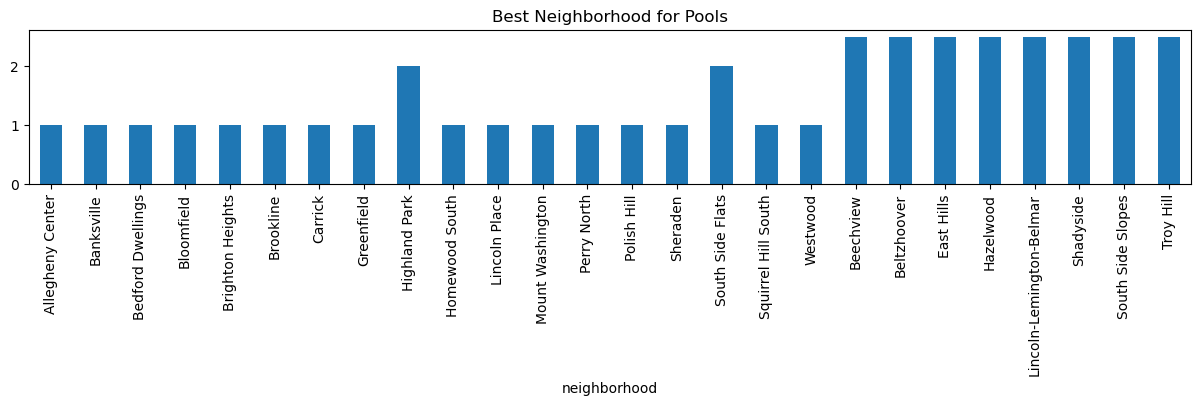

In [13]:
# Valuing spray parks higher in the metric given they are rarer
num_sprayparks = num_sprayparks * (len(pools)/len(sprayparks))

# The two datasets are concatenated, not merged, because their is no overlap between neighborhoods with pools and neighborhoods with spray parks
poolMetric = pd.concat([num_pools, num_sprayparks])

poolMetric.plot.bar(title="Best Neighborhood for Pools", x="neighborhood", figsize=(15,2))

In [14]:
poolMetric.sort_values()

neighborhood
Allegheny Center            1.0
Westwood                    1.0
Squirrel Hill South         1.0
Sheraden                    1.0
Polish Hill                 1.0
Mount Washington            1.0
Lincoln Place               1.0
Homewood South              1.0
Perry North                 1.0
Greenfield                  1.0
Bedford Dwellings           1.0
Bloomfield                  1.0
Brighton Heights            1.0
Banksville                  1.0
Brookline                   1.0
Carrick                     1.0
South Side Flats            2.0
Highland Park               2.0
Beechview                   2.5
Beltzhoover                 2.5
East Hills                  2.5
Hazelwood                   2.5
Lincoln-Lemington-Belmar    2.5
Shadyside                   2.5
South Side Slopes           2.5
Troy Hill                   2.5
Name: name, dtype: float64

# Conclusion:
There's a tie between multiple neighborhoods but due to our need for a metric I chose the one with the closest proximity to the University of Pittsburgh which is Shadyside. In addition to encouraging physical exercise, having pools close by creates a lively ambiance that improves the neighborhood's appeal and encourages pedestrian interaction.